In [1]:
# Standard modules
import pdb
import sys
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt

sys.path.append("../..")

from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Step 5.  This is where Figures for the paper are made.

Estimators from the previous step are imported, plotted, and saved.

In [2]:
pickle_path_suffix =  "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")

In [3]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)

In [4]:
from simstackplots import SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [5]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

15000-3000-3sigma_mixed_prior_qt


In [5]:
sample_number = 5000
sample_discard = 2500
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

5000-2500-3sigma_mixed_prior


In [6]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,samples_filename)):
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
else:
    print(os.path.join(pickle_path,samples_filename), 'not found')

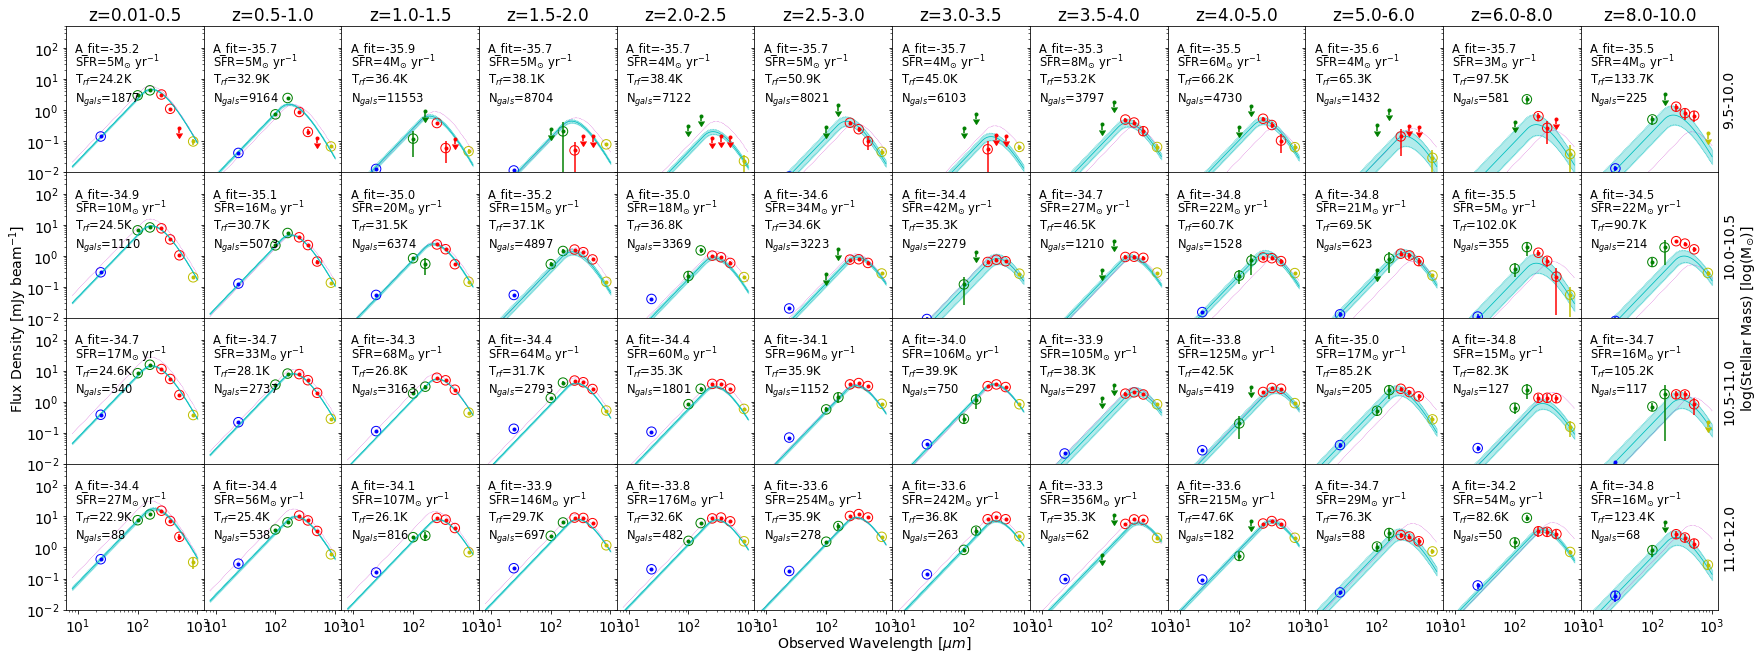

In [14]:
# V2
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_SFG_07012022.pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=False, bootstrap_dict=None, errors=('25', '75'),save_path=fig_path,save_filename=fig_filename)

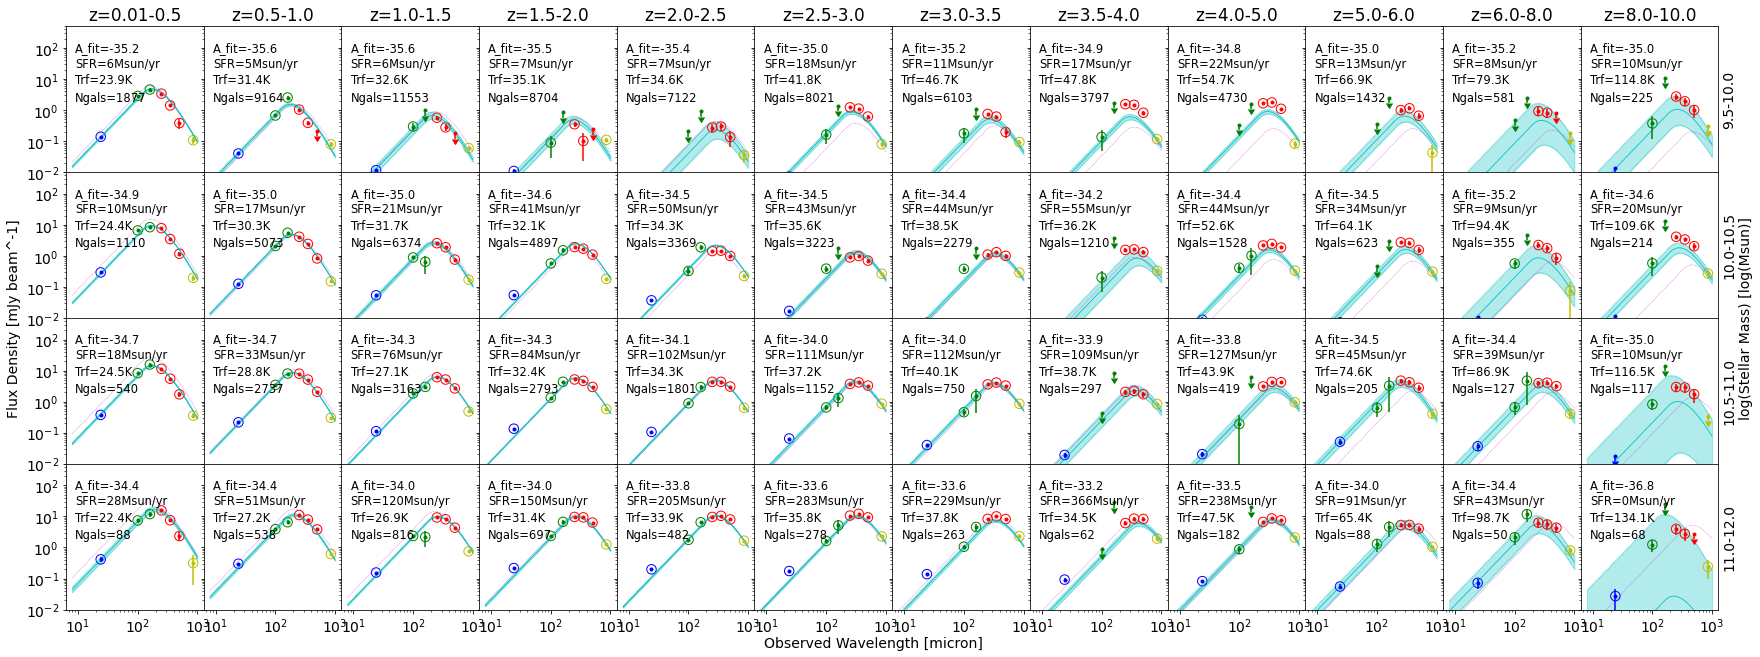

In [7]:
# V1
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_SFG_06212022.pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=False, bootstrap_dict=None, errors=('25', '75')) #,save_path=fig_path,save_filename=fig_filename)

# Import saved LIR dict and Plot Dust Temperature

In [8]:
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,lir_filename)):
    lir_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,lir_filename))
else:
    print(lir_filename, 'not found')

redshift_0.01_0.5 T = 24.1+= 1.8
redshift_0.5_1.0 T = 29.3+= 3.6
redshift_1.0_1.5 T = 30.2+= 3.3
redshift_1.5_2.0 T = 32.8+= 2.6
redshift_2.0_2.5 T = 33.9+= 2.7
redshift_2.5_3.0 T = 39.3+= 3.1
redshift_3.0_3.5 T = 37.3+= 2.1
redshift_3.5_4.0 T = 42.3+= 2.3
redshift_4.0_5.0 T = 54.3+= 5.6
redshift_5.0_6.0 T = 77.0+= 4.7
redshift_6.0_8.0 T = 99.7+= 12.0
redshift_8.0_10.0 T = 113.2+= 5.5
20.9pm3.5 + 5.9pm1.9 + 0.5pm0.2


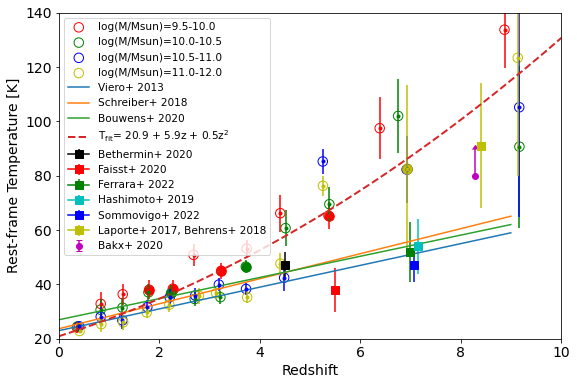

In [18]:
# V2
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1']
interloper_penalty = np.array([[ 0.20099851,  0.06879776,  0.58940041,  0.48952333],
       [ 0.0948407 ,  0.22758256,  0.08905629,  0.20070159],
       [ 0.06255247,  0.24094601,  0.19262598,  0.31398456],
       [ 0.63265298,  0.43787503,  0.27097734,  0.3647857 ],
       [ 0.75762369,  0.81363313,  0.83966041,  0.589396  ],
       [ 0.5472555 ,  0.56856069,  0.72503036,  0.73933995],
       [ 0.39905207,  0.4920069 ,  0.66795137,  0.75201525],
       [ 0.69056928,  0.6155193 ,  0.95342913,  1.40408813],
       [ 1.2220494 ,  1.1792148 ,  1.47870828,  1.08992432],
       [ 1.1264991 ,  1.53962444,  1.51358723,  0.58375984],
       [ 1.98351695,  5.0005566 ,  5.70747178, 30.15626734],
       [10.49615353, 29.52801449, 40.06153674, 43.26931138]])
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="Tdust_"+sample_prefix+"_07012022.pdf"
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior, interloper_penalty=interloper_penalty, print_values=True, save_path=fig_path,save_filename=fig_filename)

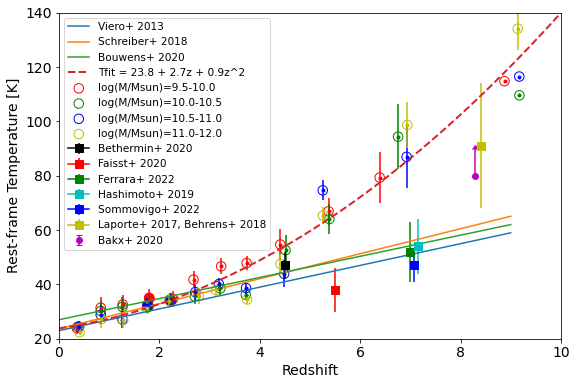

In [16]:
# V1
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="Tdust_"+sample_prefix+".pdf"
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior,print_values=False, save_path=fig_path,save_filename=fig_filename)

# Import saved SFR dict and Plot SFRD

In [11]:
tsfrd_filename =  '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,tsfrd_filename)):
    total_sfrd_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,tsfrd_filename))
else:
    print(os.path.join(pickle_path,tsfrd_filename), 'not found')

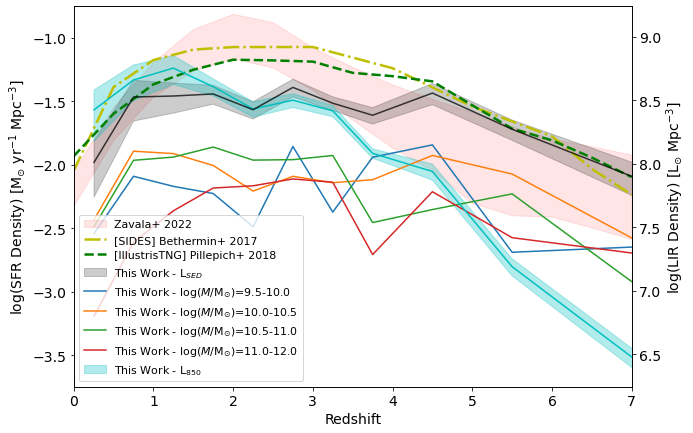

In [17]:
# V2
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="SFRD_"+sample_prefix+"_07012022.pdf"
simstack_object.plot_total_sfrd(total_sfrd_dict, xlim=[0,7], save_path=fig_path, save_filename=fig_filename)

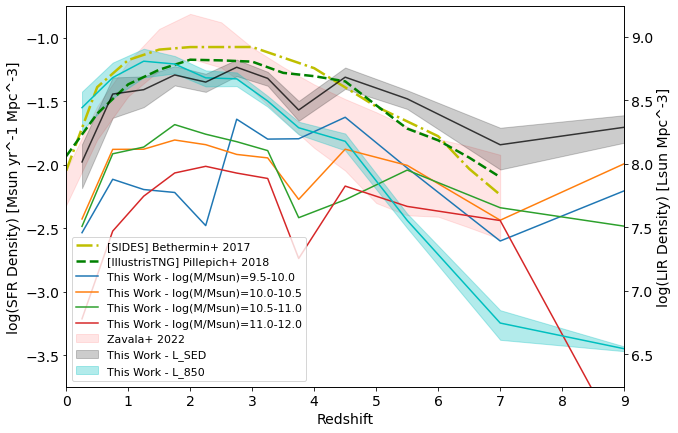

In [18]:
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SFRD_"+sample_prefix+".pdf"
simstack_object.plot_total_sfrd(total_sfrd_dict, save_path=fig_path, save_filename=fig_filename)